# Homework #3: Nicolas Acton

Consider two random variables h1 and h2 that are distributed according to a Gaussian distribution with zero
mean, a unit variance and a correlation coefficient of 0.5. Generate 1000 realizations of these two random
variables to get 1000 two-dimensional data points, {(h1i, h2i), i=1,…,1000}. 

## 1.
Describe the method that you use to generate 1000 correlated Gaussian data points. One method will
be to create a 2x2 covariance matrix C where the main diagonal elements are equal to 1 and the offdiagonal
elements are equal to 0.5. Then apply a Cholesky factorization to the matrix C to get C = LL’,
where L is a lower triangular matrix and L’ is the transpose of L. Let y1 and y2 be two statistically
independent vectors, each containing 1000 realizations drawn from N(0,1); use the Box-Muller method
to generate these realizations. Let [h1 h2]= [y1 y2] L. Show that h1 and h2 contain 1000 realizations
drawn from a bivariate Gaussian distribution with zero means, unit variances, and correlation
coefficient of 0.5.

In [1]:
# As demonstrated in HMWK2, the Box-Muller method can be used to generate realizations of normal distributions.
# However, instead of plotting the bi-variates together we'll plot them seperately.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import random
    
def rng(a, m, c, xi, n):
    u = []
    u.append(xi)
    for i in range(1, n-1):
        x = (a*u[i-1] + c)%m
        u.append(x)
        i = i + 1
    u2 = []
    for i in range(0,n-1):
        u2.append(u[i]/m)
    return u2
        

def boxMully1(a, m, c, xi, n):
    # Define Box-Muller Method
    u1 = rng(a,m,c,xi,n)
    x = []
    for i in range(0,n-1):
        x.append(np.sqrt(-2*np.log(u1[i]))*np.cos(2*np.pi*a*u1[i] + 2*np.pi*(c/m)))
        i = i +1
    return x

def boxMully2(a, m, c, xi, n):
    # Define Box-Muller Method
    u1 = rng(a,m,c,xi,n)
    x = []
    for i in range(0,n-1):
        x.append(np.sqrt(-2*np.log(u1[i]))*np.sin(2*np.pi*a*u1[i] + 2*np.pi*(c/m)))
        i = i +1
    return x

def gaussPlot(x):
    plt.hist(x, 30, range=[-5, 5])
    plt.ylabel('some numbers')
    plt.show()
    pass

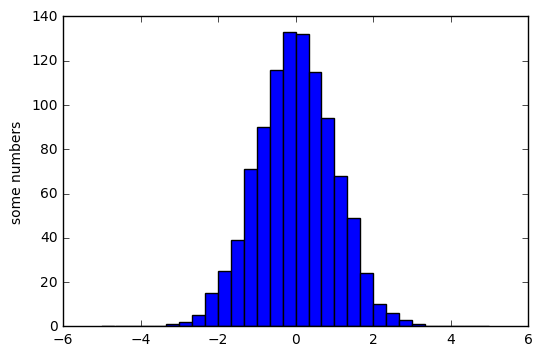

In [2]:
# We can use the function to generate one factorization
y1 = boxMully1(101, 1069, 1, 1, 1000)
gaussPlot(y1)

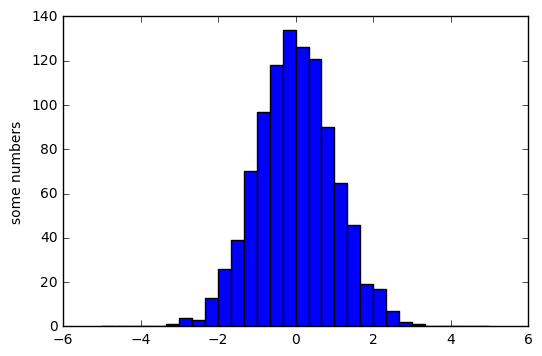

In [3]:
# An another
y2 = boxMully2(101, 1069, 1, 1, 1000)
gaussPlot(y2)

The Covariance Matrix, C, with a covariance coefficient of $\rho = 0.5$ can demonstrated as $C = [\begin{matrix} 1 & 0.5 \\ 0.5 & 1 \end{matrix}]$. Applying a Cholesky factorization can help find a lower triangular matrix L which will be applied to the previously generated Gaussian bi-variate to correlate them correctly.
$$ C = \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix} = LL^{T} = \begin{bmatrix} 1 & 0 \\ \rho & \sqrt{1-\rho^{2}} \end{bmatrix} \begin{bmatrix} 1 & \rho \\ 0 & \sqrt{1-\rho^{2}} \end{bmatrix} $$
So $ L =  \begin{bmatrix} 1 & 0 \\ \rho & \sqrt{1-\rho^{2}} \end{bmatrix} =  \begin{bmatrix} 1 & 0 \\ 0.5 & \sqrt{0.75} \end{bmatrix} $

In [4]:
L = [[1,0],[0.5, 0.866025404]]

We are going to let $(h_{1} h_{2}) = (y_{1} y_{2})L$

In [5]:
# h is an array of arrays that represents (h1 h2)
y = np.column_stack((y1,y2))

def constructH(y):
    global L
    h = []
    for i in range(0,998):
        t = np.matmul(y[i],L)
        h.append(t)
        i = i+1
    return h

h = constructH(y)

In [6]:
# Split h into two lists, h1 and h2, for further analysis
h1 = []
h2 = []
# Populate the lists
for i in range(0,998):
    h1.append(h[i][0])
    h2.append(h[i][1])

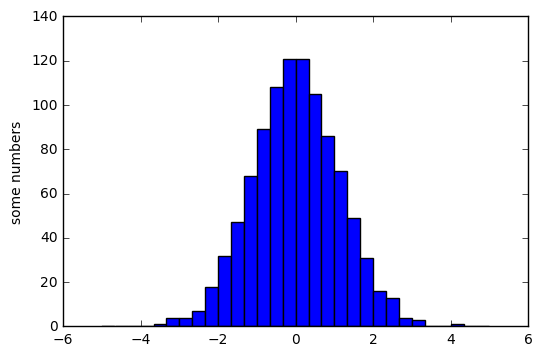

In [7]:
# To verify, lets plot both and check their distribution.
gaussPlot(h1)

In [8]:
# Lets also calculate their means and st.devs.
meanH1 = np.mean(h1)
print("The mean is " + str(meanH1))
stdevH1 = np.std(h1)
print("The standard deviation is " + str(stdevH1))

The mean is 0.00743601776063
The standard deviation is 1.11211381266


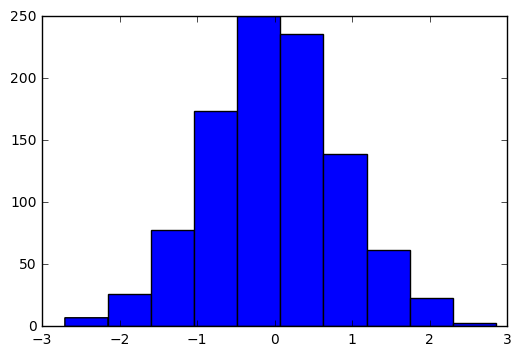

In [9]:
plt.hist(h2)
plt.show()
pass

In [10]:
meanH2 = np.mean(h2)
print("The mean is " + str(meanH2))
stdevH2 = np.std(h2)
print("The standard deviation is " + str(stdevH2))

The mean is 0.0024157162477
The standard deviation is 0.858628351713


So far, the means are incredibly close to zero and we have a unit variances.

In [11]:
# Now lets build standardized arrays for h1 and h2 that will help us find the correlation coefficient.
z1 = []
z2 = []

for i in range(0,998):
    z1.append((h1[i]-meanH1)/stdevH1)
    z2.append((h2[i]-meanH2)/stdevH2)

# Now multiply the corresponding values
z = []
for i in range(0,998):
    z.append(z1[i]*z2[i])
zsum = np.sum(z)
print("Sum of standardized products is " + str(zsum))
rho = zsum/((len(z))-1)
print("The coefficient of correlation is " + str(rho))

Sum of standardized products is 445.137625137
The coefficient of correlation is 0.446477056305


We have shown arithmetically that the bivariate Gaussian distribution between the RVs h1 and h2 are zero mean with unit variances and a correlation coefficient very close to 0.5!

Source for Calculating Correlation Coefficient: https://www.thoughtco.com/how-to-calculate-the-correlation-coefficient-3126228

## 2.
Perform a QQ plot for the realizations of the random variable h1 to show that they follow a Gaussian
distribution, N(0,1). To this end, draw 1000 samples of size 999 data points for the random variable,
h1; then plot the sample medians and the interquartile ranges on a 2-dimensional graph versus the 999
quantiles of the Gaussian distribution, N(0,1). The interquartile ranges are displayed using vertical bars
for each of the quantiles. Discuss the results.

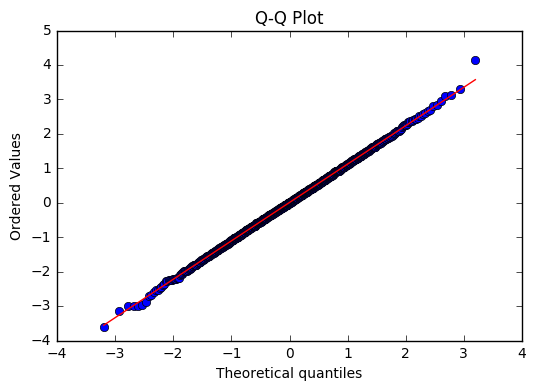

In [12]:
# First we use the scipy statistics library to make the plot and use pylab to plot it.
import pylab
import scipy.stats as stats

stats.probplot(h1, dist="norm", plot=pylab)
pylab.title("Q-Q Plot")
pylab.show()

As demonstrated, h1 does seem to follow a Gaussian normal distribution of N(0,1). Let's draw this 1000 more times. However, we're only really concerned with the medians and the IQR for each value along the 999 value sets, so let's retrieve those isntead of massive amounts of data.

In [29]:
# Lets create a function that will make h1 using the seed as a differentiator.
def buildH(x1):
    # First build the h1 value
    y1 = boxMully1(101, 1069, 1, x1, 1000)
    y2 = boxMully2(101, 1069, 1, x1, 1000)
    y = np.column_stack((y1,y2))
    h = constructH(y)
    h1 = []
    for i in range(0, len(y1)-1):
        h1.append(h[i][0])
    h1.sort()
    return h1

# Now lets create a function that will build as many instances of h1 as we need, seeding from 0 to n
# As long as n is less than the orginal m, this should work!
def hSet(n):
    set = []
    for i in range(1, n+1):
        set.append(buildH(i))
        i = i+1
    return set

# Now lets create a function that will iterate through all the sets and retrieve a list of medians and their associated
# IQR for each value of h1!
def medqq(n):
    # generate set of h1
    temp = hSet(n)
    # transpose said set
    temp2 = np.transpose(temp)
    # create sets of median, q1, and q3
    temp3 = []
    for i in range(0, len(temp2)-1):
        temp3.append([np.median(temp2[i]), np.percentile(temp2[i],25), np.percentile(temp2[i],75)])
        i = i+1
    return temp3

In [30]:
# Now that we've built all that, lets build our set of 1000 points and plot it.
# Just for fun, we'll time it while we're at it and maybe improve our functions with some parallelization later.

# Returns dataset of medians
def retMed(n):
    medianData = []
    for i in range(0,len(n)):
        medianData.append(n[i][0])
        i = i+1
    return medianData

# Returns dataset of first quarters from IQR
def retQ1(n):
    q1Data = []
    for i in range(0,len(n)):
        q1Data.append(n[i][1])
        i = i+1
    return q1Data

# Returns dataset of third quarters from IQR
def retQ3(n):
    q3Data = []
    for i in range(0,len(n)):
        q3Data.append(n[i][2])
        i = i+1
    return q3Data

# Returns all 3 of the previously mentioned, for brevity.
def retAll(n):
    med = retMed(n)
    q1 = retQ1(n)
    q2 = retQ3(n)
    return([med, q1, q2])


/Users/nacton/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log
/Users/nacton/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log


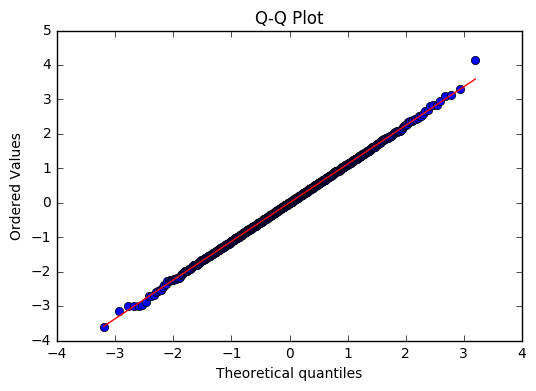

In [31]:
n = 1000
data = medqq(n)
x = retMed(data)
y = retQ1(data)
z = retQ3(data)
# For whatever reason, this one specific item was causing major hassle. Had to be removed.

stats.probplot(x, dist="norm", plot=pylab)
pylab.title("Q-Q Plot")
pylab.show()

## 3. 
Implement the projection algorithm described in Chapter 6, Part 3, pp. 357-360 of the class notes.
Perform a QQ plot to show that the squared projection statistics obey a chi-squared distribution with 2
degrees of freedom when the 2 random variables, h1 and h2, follow a bivariate Gaussian distribution
with zero means, unit variances and a correlation 0.5 (see Question 1). To this end, draw 1000 samples
of size 999 data points of the projection statistics; then plot the sample medians and the interquartile
ranges on a 2-dimensional graph versus the 999 quantiles of the Gaussian distribution, N(0,1). The
interquartile ranges are displayed using vertical bars for each of the quantiles. Discuss the results.

In [ ]:
# Calculate M for h1 and h2
# We'll perform the projection on h1 and h2 from problem 1 to help build/verify our functions.

# First we calculate M. This will return a two element set.
def M(h1,h2):
    m1 = np.median(h1)
    m2 = np.median(h2)
    return([m1, m2])

print(M(h1,h2))

In [ ]:
# Then we find the uj set for hj. This will be a set of two elements, n times.
def U(h1, h2):
    M1 = M(h1,h2)
    u1 = []
    u2 = []
    for i in range(0, len(h1)):
        u1.append(h1[i] - M1[0])
        u2.append(h2[i] - M1[1])
        i = i+1
    return([u1,u2])

In [ ]:
# Then we can find the vectors of each element in U.
# Lets create a function to find magnitude of two elements.
def mag(h1, h2):
    m = np.sqrt(h1**2 + h2**2)
    return m

# Then lets apply that function        
def V(h1, h2):
    U1 = U(h1,h2)
    v1 = []
    v2 = []
    for i in range(0, len(h1)):
        v1.append(h1[i]/mag(h1[i],h2[i]))
        v2.append(h2[i]/mag(h1[i],h2[i]))
    return([v1,v2])

In [ ]:
# We can then find z values by applying a dot matrix multiplication to all h elements with v
# First reconstruct h as a set of two elements n times.
def recH(h1,h2):
    h = []
    for i in range(0,len(h1)-1):
        h.append([h1[i],h2[i]])
    return h

# Then apply this function to retrieve a set of one z value for each set of h1,h2 values
def Z(h1,h2):
    V1 = V(h1,h2)
    h = recH(h1,h2)
    Z1 = []
    for i in range(0, len(h1)-1):
        Z1.append(np.dot(h[i],(V1[0][i],V1[1][i])))
    return Z1

In [ ]:
# Next, we find the median of our Z RV and find projection from the MAD

def madZ(Z1, n, m):
    c = 1 + 15/(m-n)
    med = np.median(Z1)
    temp = []
    for i in range(0,len(Z1)-1):
        temp.append(abs(Z1[i]-med))
    tempMed = np.median(temp)
    mad = 1.4825*c*tempMed
    return (mad,med)

def projP(Z1, n, m):
    proj = []
    temp = madZ(Z1, n, m)
    mad = temp[0]
    med = temp[1]
    for i in range(0, len(Z1)-1):
        proj.append((abs(Z1[i]-med)/mad))
        i = i+1
    return proj

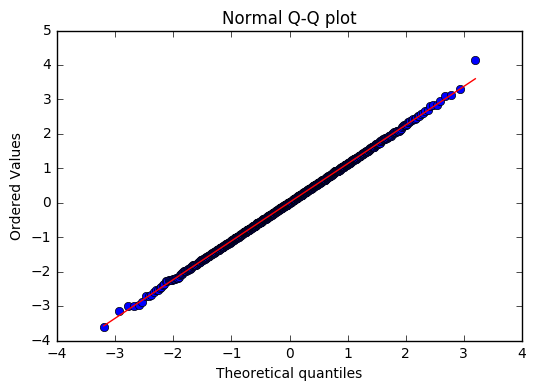

In [32]:
# From here, we can plot this to demonstrate
stats.probplot(z, plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

## 4. 
Replace n data-points with outliers by increasing the magnitude of their h values and identify the
outliers using a statistical test applied to the projections statistics. Repeat this procedure for an
increasing number of outliers, n =1, 2, 3,…,v. Determine the maximum fraction of outliers that can be
identified by this method.